In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',sep='\t',names = column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_title = pd.read_csv('Movie_Id_Titles')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_title,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title_x,title_y
0,0,50,5,881250949,Star Wars (1977),Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977),Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977),Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977),Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977),Star Wars (1977)


In [21]:
df.groupby('title_x')['rating'].mean().sort_values(ascending=False).head()

title_x
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [22]:
df.groupby('title_x')['rating'].count().sort_values(ascending=False).head()

title_x
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [25]:
 ratings = pd.DataFrame(df.groupby('title_x')['rating'].mean())

In [28]:
ratings.head()

,rating
title_x,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [30]:
ratings['Num of rating'] = pd.DataFrame(df.groupby('title_x')['rating'].count())

In [31]:
ratings.head()

,rating,Num of rating
title_x,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


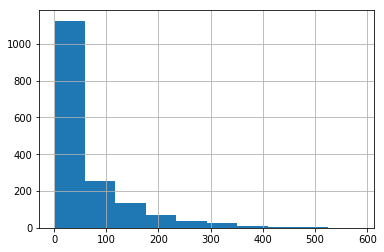

In [32]:
ratings['Num of rating'].hist()

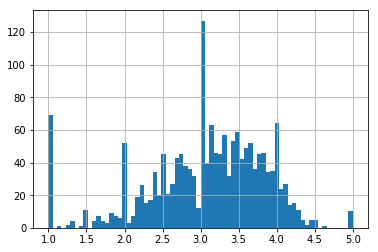

In [34]:
ratings['rating'].hist(bins=70)

C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


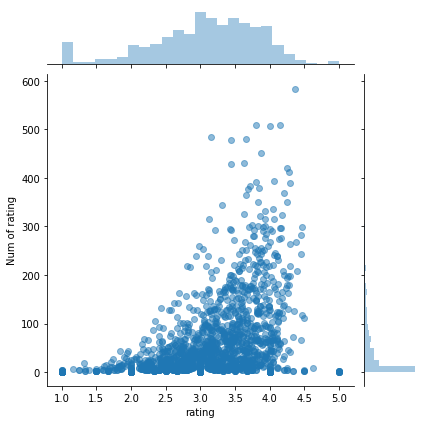

In [35]:
sns.jointplot(x='rating',y='Num of rating',data=ratings,alpha=0.5
             )

In [38]:
moviemat = df.pivot_table(index='user_id',columns='title_x',values='rating')
moviemat.head()

title_x,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
ratings.sort_values('Num of rating',ascending=False).head()

,rating,Num of rating
title_x,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [43]:
startwars_ratings = moviemat['Star Wars (1977)']
fargo_ratings = moviemat['Fargo (1996)']
startwars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [44]:
#now recommend using corrwith  correlation with 

In [46]:
similar_to_startwar = moviemat.corrwith(startwars_rating)
similar_to_fargo = moviemat.corrwith(fargo_ratings)

C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [49]:
corr_startwar = pd.DataFrame(similar_to_startwar,columns=['Correlation'])
corr_startwar.dropna(inplace=True)
corr_startwar.head()

,Correlation
title_x,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [54]:
corr_startwar.sort_values('Correlation',ascending=False).head()

,Correlation,Num of rating
title_x,,
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Man of the Year (1995),1.0,9


In [59]:
corr_startwar.head()

,Correlation,Num of rating
title_x,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [119]:
result = corr_startwar[corr_startwar['Num of rating']>100].sort_values('Correlation',ascending=False)

In [142]:
recommend = pd.DataFrame(result['Correlation'].head(2))

In [146]:
recommend

,Correlation
title_x,
Star Wars (1977),1.000000
"Empire Strikes Back, The (1980)",0.748353


In [147]:
goldeneye_rating = moviemat['GoldenEye (1995)']

In [149]:
similar_to_goldeneye=moviemat.corrwith(goldeneye_rating)

C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DIVY SHAH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [155]:
corr_goldeneye = pd.DataFrame(similar_to_goldeneye,columns=['Correlation'])

In [159]:
corr_goldeneye.dropna(inplace=True)

In [161]:
corr_goldeneye.head()

,Correlation
title_x,
1-900 (1994),1.000000
101 Dalmatians (1996),0.318502
12 Angry Men (1957),0.087310
187 (1997),0.785714
2 Days in the Valley (1996),-0.159343


In [163]:
corr_goldeneye = corr_goldeneye.join(ratings['Num of rating'])

In [164]:
corr_goldeneye.sort_values('Correlation',ascending=False)

,Correlation,Num of rating
title_x,,
1-900 (1994),1.000000,5
Hear My Song (1991),1.000000,8
Two or Three Things I Know About Her (1966),1.000000,4
"Jerky Boys, The (1994)",1.000000,3
"Colonel Chabert, Le (1994)",1.000000,4
Killer (Bulletproof Heart) (1994),1.000000,4
Blood For Dracula (Andy Warhol's Dracula) (1974),1.000000,5
Albino Alligator (1996),1.000000,6
Nina Takes a Lover (1994),1.000000,6


In [168]:
corr_goldeneye[corr_goldeneye['Num of rating']>100].sort_values('Correlation',ascending=False)

,Correlation,Num of rating
title_x,,
GoldenEye (1995),1.000000,131
Ulee's Gold (1997),0.806091,184
Down Periscope (1996),0.728723,101
Jungle2Jungle (1997),0.646619,132
"Philadelphia Story, The (1940)",0.600751,104
"Nutty Professor, The (1996)",0.600727,163
Sabrina (1995),0.586659,190
Kiss the Girls (1997),0.582975,143
Donnie Brasco (1997),0.567606,147
